In [29]:
# Function to load the data from the file
def load_data(file_path, start, end):
    predictions = []
    ground_truths = []
    
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i>end:
                break
            if i<start:
                continue
            if line.startswith("Out"):
                parts = line.strip().split(': ')[1].split(' ,')
                prediction = float(parts[0])
                ground_truth = float(parts[1])
                predictions.append(prediction)
                ground_truths.append(ground_truth)
                
    return predictions, ground_truths


In [30]:
# File path
endTrainingData = 3*60000
totalData = endTrainingData+86000-60000
file_path = 'pred'
predictionsRanged = []
ground_truthRanged = []
# Load the data
interval = 4000
for i in range(endTrainingData, totalData, interval):
    predictions, ground_truths = load_data(file_path,i,i+interval)
    predictionsRanged.append(predictions)
    ground_truthRanged.append(ground_truths)


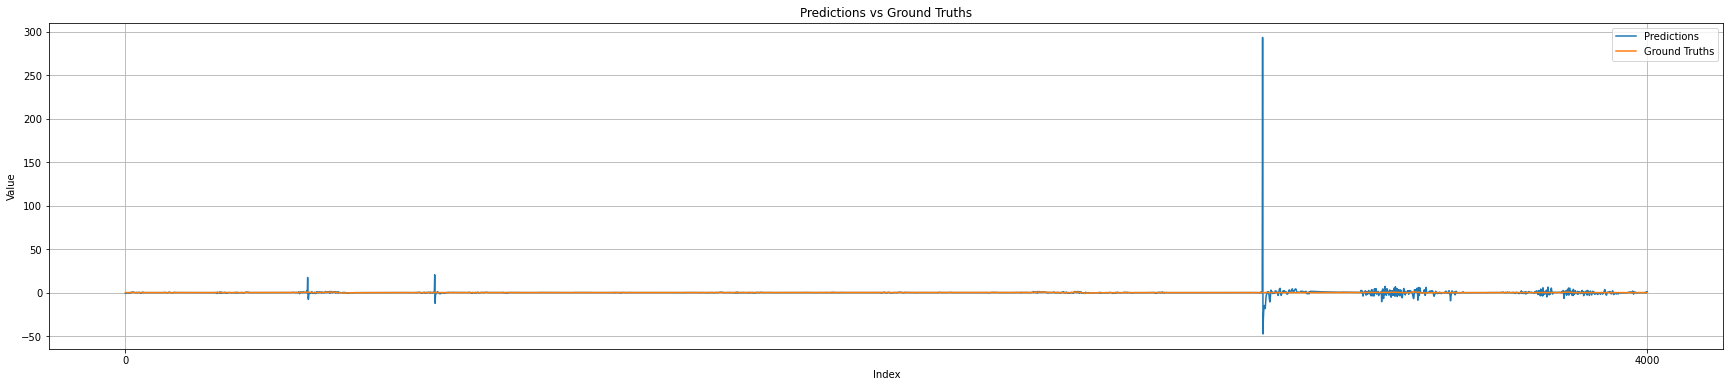

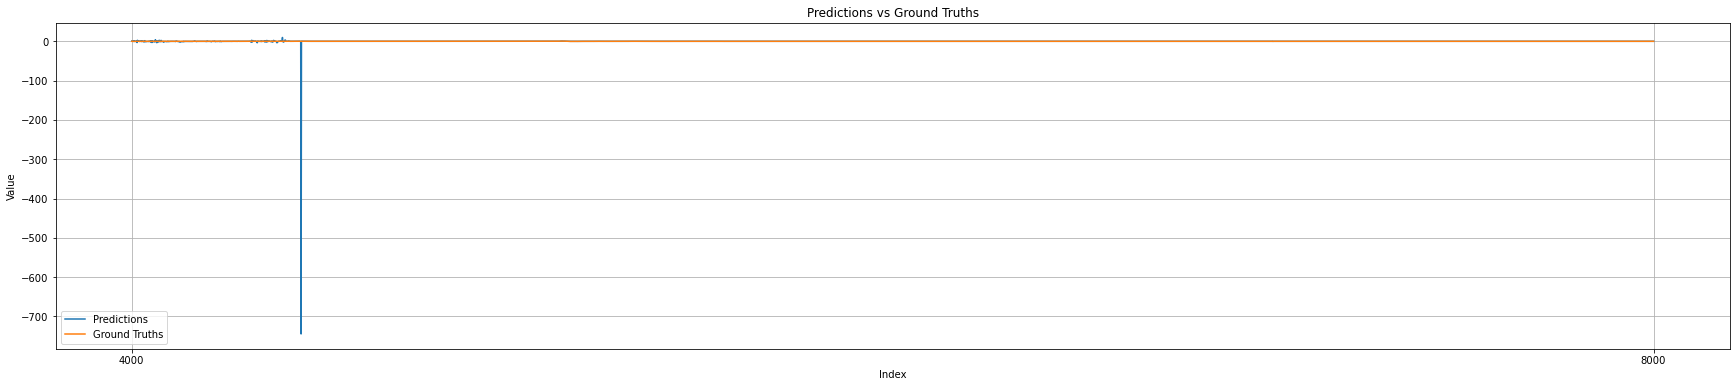

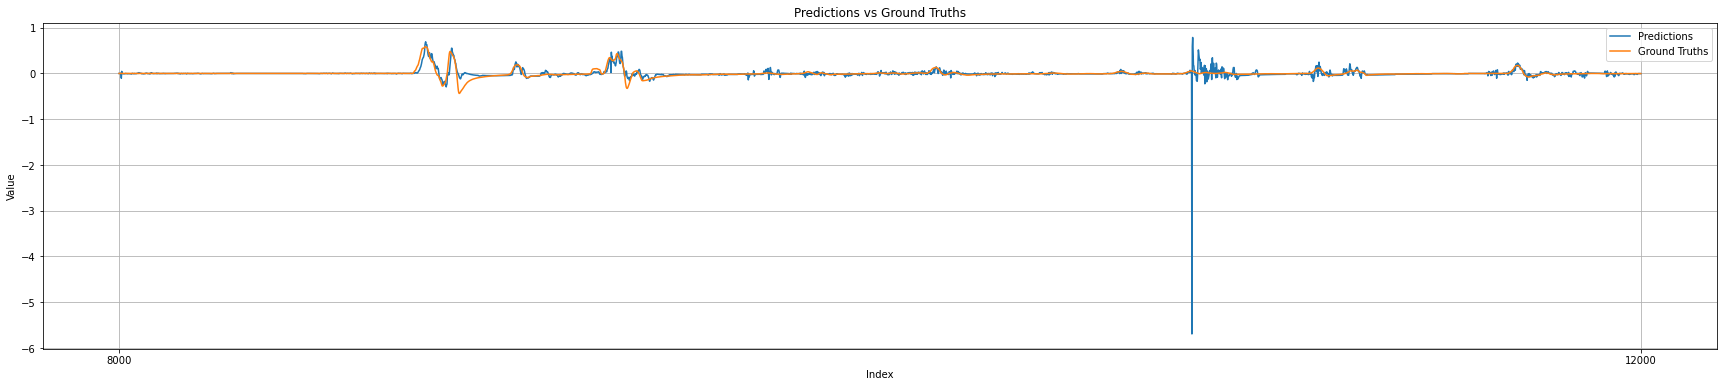

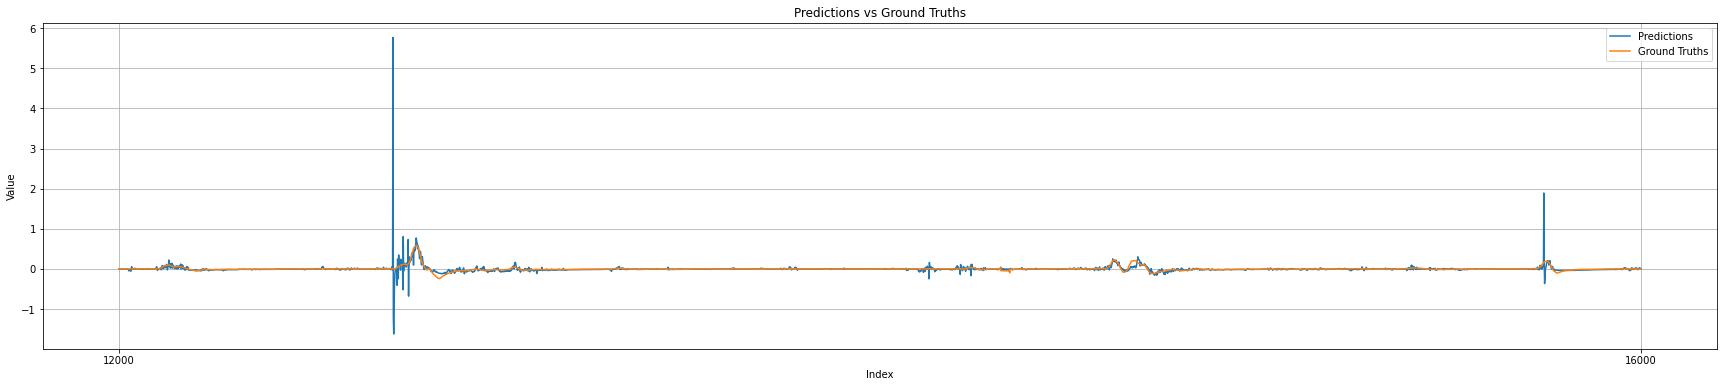

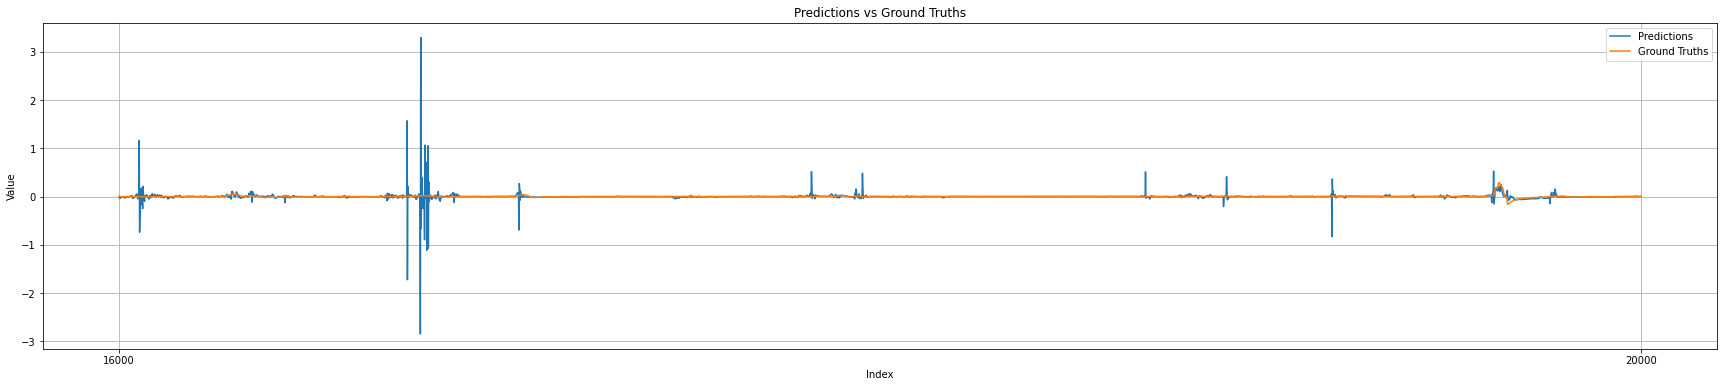

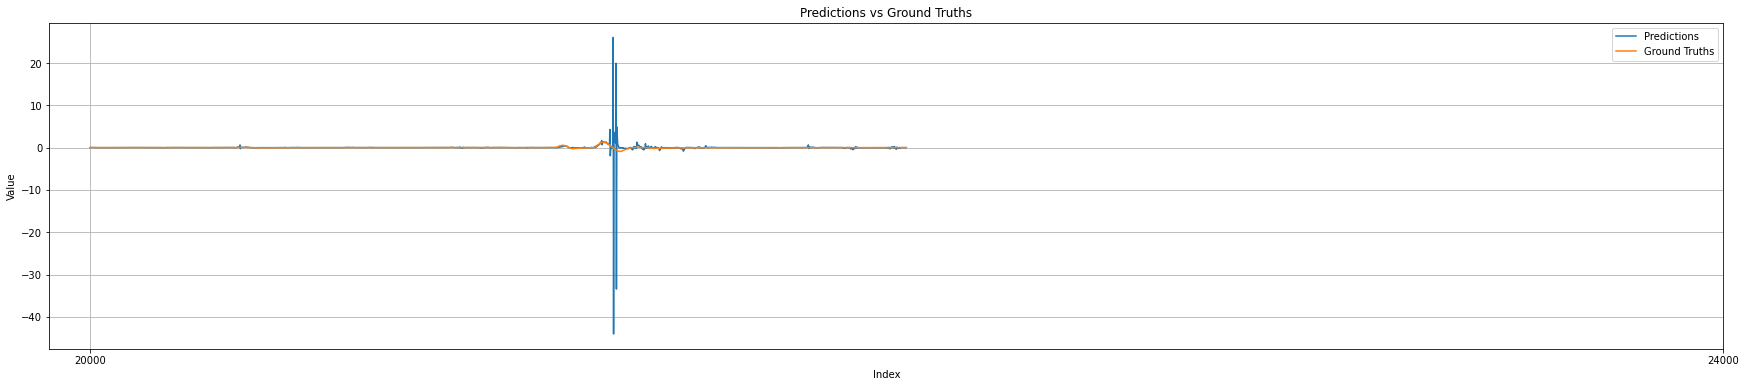

In [31]:
import matplotlib.pyplot as plt
# Plot the data

for i in range(len(predictionsRanged)):
    plt.figure(figsize=(30, 6))
    plt.plot(predictionsRanged[i], label='Predictions')
    plt.plot(ground_truthRanged[i], label='Ground Truths')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Predictions vs Ground Truths')
    plt.xticks([0, interval], [str(i*interval), str((i+1) * interval)])
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
predictions, ground_truths = load_data(file_path,0,totalData)


In [33]:
import pandas as pd

# Replace 'example.csv' with the path to your CSV file
csv_file_path = '../duplicatedMergedData.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.head(10)

,hour,1,2,3,4,5,6,7,8,9,...,415,416,417,418,419,420,Tairua,CR Rain,Pinnacles Rain,Water Movement in 6 Hour
0,17,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.117000,0.000000,0.0,-0.007000
1,13,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-5.269042,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.361000,0.000000,0.0,-0.008000
2,19,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.085000,0.000000,0.0,0.000000
3,12,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.461000,0.000000,0.0,-0.022000
4,18,17.431137,16.296302,8.774919,-2.631297,-16.516371,-17.412500,-20.000000,-20.00000,-20.000000,...,0.730412,-2.712678,0.602583,-2.994834,-3.224359,3.251568,1.791000,0.000000,0.0,-0.044333
5,6,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-13.542528,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.532000,0.000000,0.0,-0.025000
6,18,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-16.210931,-15.913767,-17.41799,-20.000000,...,13.412004,10.236154,15.236500,13.318188,15.264036,12.282481,1.495667,0.666667,0.0,0.021333
7,6,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.471667,0.000000,0.0,-0.014667
8,8,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.228000,0.000000,0.0,-0.004667
9,18,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.00000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,1.324000,0.000000,0.0,-0.011000


In [34]:
tairua = df['Tairua'].values
predictions+=tairua[:totalData]
ground_truths+=tairua[:totalData]

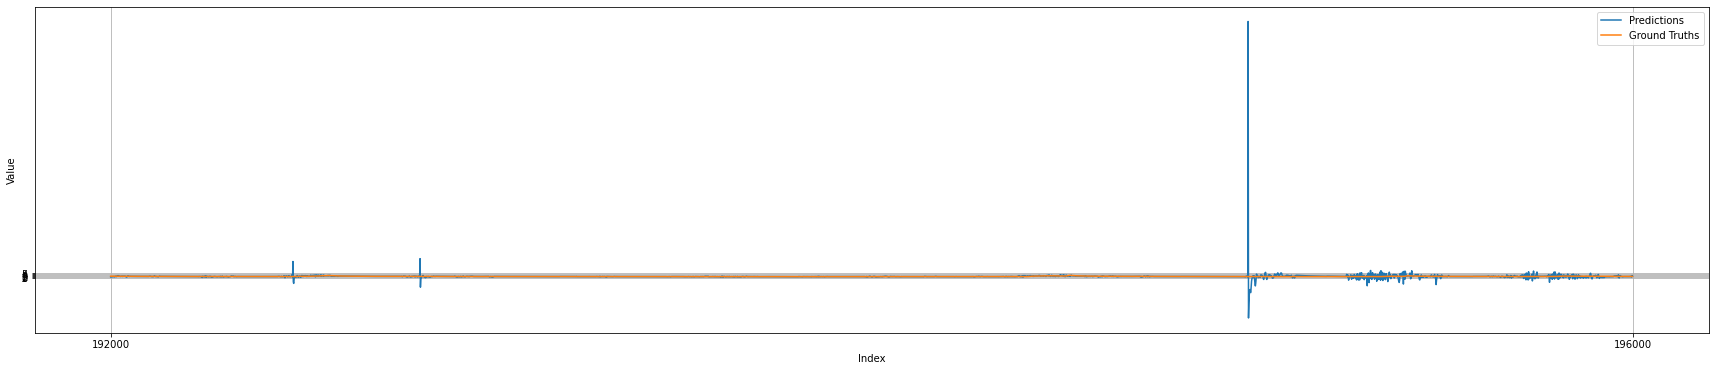

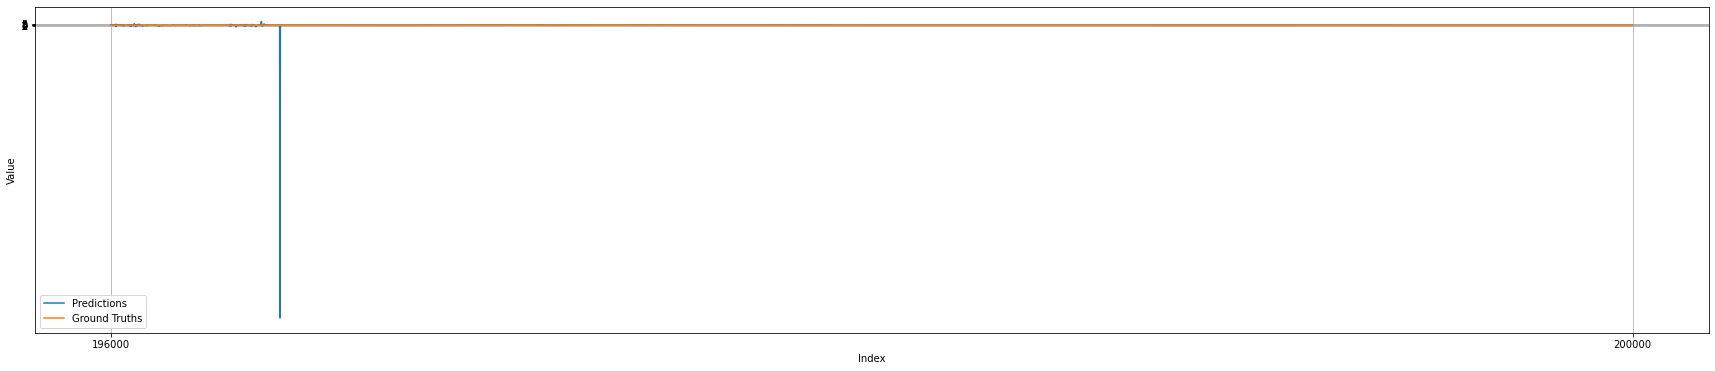

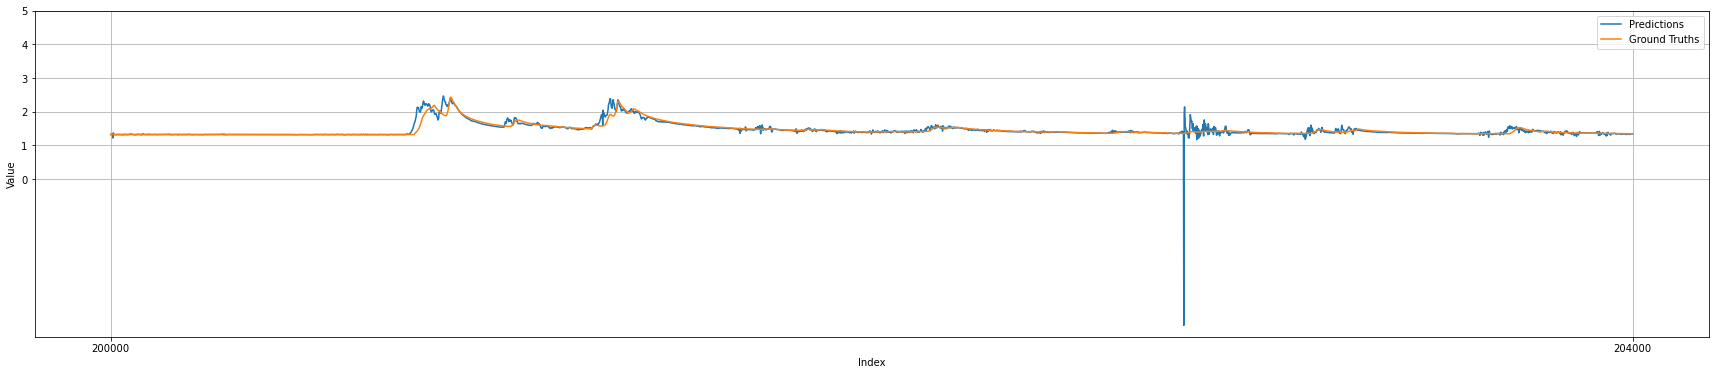

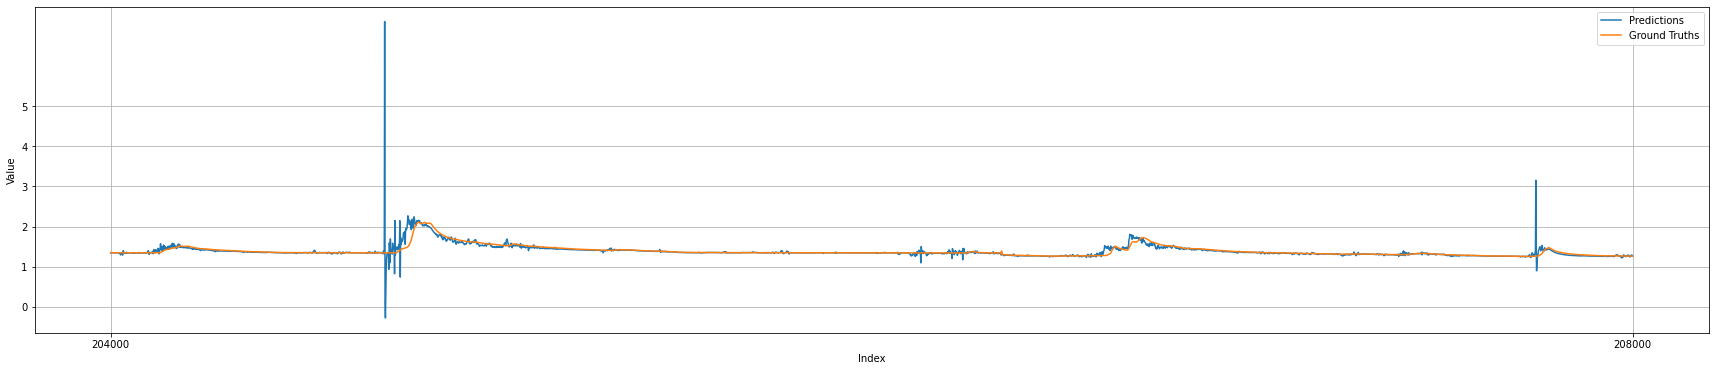

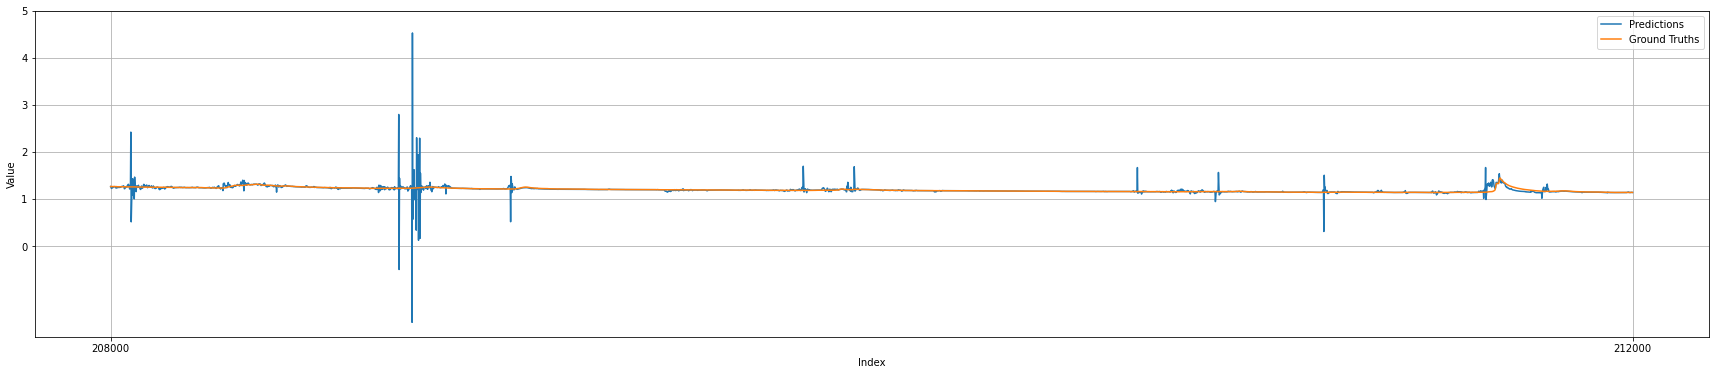

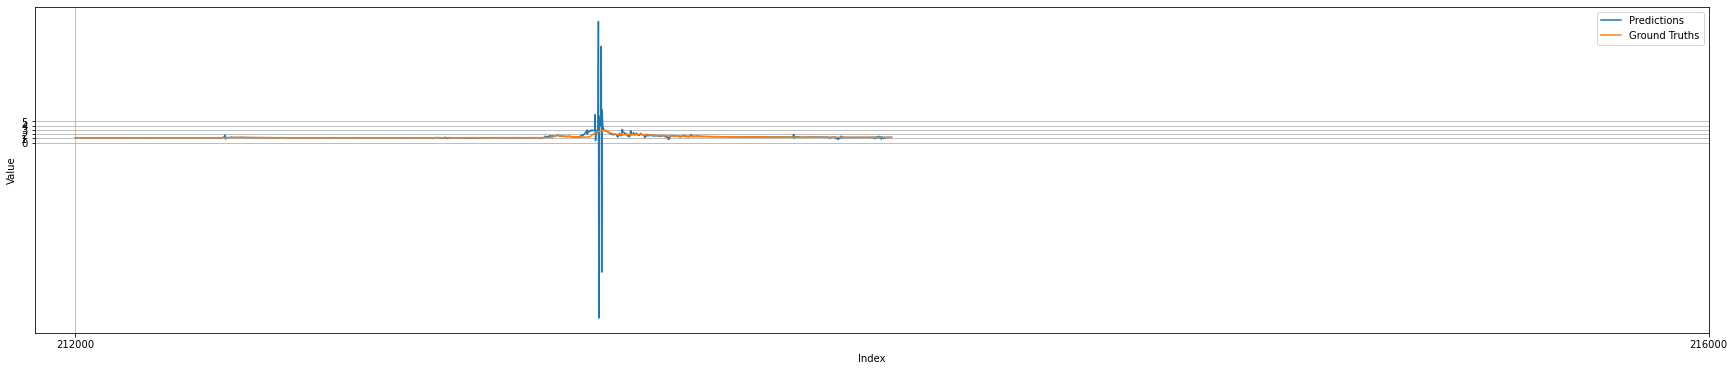

In [35]:
for i in range(endTrainingData, totalData, interval):
    plt.figure(figsize=(30, 6))
    plt.plot(predictions[i:i+interval], label='Predictions')
    plt.plot(tairua[i:i+interval], label='Ground Truths')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks([0, interval], [str(i), str(i + interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.show()